## Model evaluation

In [1]:
import itertools
import seaborn as sns
from sklearn import preprocessing
from melanoma_utility_scripts import *

pd.set_option('max_colwidth', 120)
!ls /kaggle/input/melanomas-oof/

129-oof.csv  138-oof.csv      147-oof.csv      153-oof.csv	18-meta-oof.csv
131-oof.csv  139-oof.csv      149-oof.csv      156-oof.csv	19-meta-oof.csv
132-oof.csv  14-meta-oof.csv  15-meta-oof.csv  157-oof.csv	20-meta-oof.csv
134-oof.csv  140-oof.csv      150-oof.csv      159-oof.csv
136-oof.csv  145-oof.csv      151-oof.csv      16-meta-oof.csv
137-oof.csv  146-oof.csv      152-oof.csv      17-meta-oof.csv


In [2]:
model_paths = [
    ('/kaggle/input/melanomas-oof/129-oof.csv',          ['pred_last']),    #CV 0.934
#     ('/kaggle/input/melanomas-oof/131-oof.csv',          ['pred_last']),    #CV 0.930
    ('/kaggle/input/melanomas-oof/132-oof.csv',          ['pred_last']),    #CV 0.936
    ('/kaggle/input/melanomas-oof/134-oof.csv',          ['pred_last']),    #CV 0.934
    ('/kaggle/input/melanomas-oof/136-oof.csv',          ['pred_last']),    #CV 0.937
    ('/kaggle/input/melanomas-oof/137-oof.csv',          ['pred_last']),    #CV 0.933
    ('/kaggle/input/melanomas-oof/139-oof.csv',          ['pred_last']),    #CV 0.940
    ('/kaggle/input/melanomas-oof/140-oof.csv',          ['pred']),         #CV 0.937
#     ('/kaggle/input/melanomas-oof/145-oof.csv',          ['pred']),         #CV 0.931
#     ('/kaggle/input/melanomas-oof/146-oof.csv',          ['pred']),         #CV 0.931
#     ('/kaggle/input/melanomas-oof/147-oof.csv',          ['pred']),         #CV 0.930
    ('/kaggle/input/melanomas-oof/150-oof.csv',          ['pred']),         #CV 0.933
#     ('/kaggle/input/melanomas-oof/151-oof.csv',          ['pred']),         #CV 0.930
    ('/kaggle/input/melanomas-oof/152-oof.csv',          ['pred']),         #CV 0.933
#     ('/kaggle/input/melanomas-oof/153-oof.csv',          ['pred']),         #CV 0.929
#     ('/kaggle/input/melanomas-oof/156-oof.csv',          ['pred']),         #CV 0.931
    ('/kaggle/input/melanomas-oof/157-oof.csv',          ['pred']),         #CV 0.938
#     ('/kaggle/input/melanomas-oof/159-oof.csv',          ['pred']),         #CV 0.931
    
    # meta models
    ('/kaggle/input/melanomas-oof/16-meta-oof.csv',          ['pred']),     #CV 0.681
    ('/kaggle/input/melanomas-oof/17-meta-oof.csv',          ['pred']),     #CV 0.665
    ('/kaggle/input/melanomas-oof/18-meta-oof.csv',          ['pred']),     #CV 0.783
    ('/kaggle/input/melanomas-oof/19-meta-oof.csv',          ['pred']),     #CV 0.676
    ('/kaggle/input/melanomas-oof/20-meta-oof.csv',          ['pred']),     #CV 0.696
]

cv_dict = {'129': 0.934, 
#            '131': 0.930, 
           '132': 0.936, 
           '134': 0.934, 
           '136': 0.937, 
           '137': 0.933, 
           '139': 0.940, 
           '140': 0.937, 
#            '145': 0.931, 
#            '146': 0.931, 
#            '147': 0.930, 
           '150': 0.933, 
#            '151': 0.930, 
           '152': 0.933, 
#            '153': 0.929, 
#            '156': 0.931, 
           '157': 0.938, 
#            '159': 0.931, 
          }

oof_df = pd.read_csv(model_paths[0][0])[['image_name', 'target']]

for model_path, cols in model_paths:
    oof_df_ = pd.read_csv(model_path)
    oof_df_ = oof_df_[cols]
    ds_path = model_path.split('/')[4]
    if 'meta' in ds_path:
        model_num = ds_path[:7]
    else:
        model_num = ds_path[:3]
    for col in [col for col in oof_df_.columns if 'pred' in col]:
        oof_df[f'{model_num}'] = oof_df_[col]
        
display(oof_df.head())
display(oof_df.describe())

,image_name,target,129,132,134,136,137,139,140,150,152,157,16-meta,17-meta,18-meta,19-meta,20-meta
0,ISIC_2637011,0,0.047175,0.144233,0.146731,0.044674,0.083700,0.123720,0.073045,0.078864,0.113143,0.034374,0.425702,0.361196,0.262490,0.093734,0.011699
1,ISIC_0076262,0,0.019303,0.032375,0.044929,0.039752,0.023398,0.022119,0.022233,0.018398,0.018966,0.032616,0.424776,0.362461,0.130832,0.099011,0.012273
2,ISIC_0074268,0,0.014166,0.016950,0.017082,0.028074,0.028234,0.030384,0.015810,0.017660,0.014435,0.026223,0.378841,0.380684,0.267353,0.118810,0.008710
3,ISIC_0015719,0,0.010973,0.011653,0.015682,0.026075,0.023170,0.030147,0.019442,0.021012,0.014218,0.015582,0.424776,0.362461,0.261717,0.099011,0.012273
4,ISIC_0082543,0,0.018701,0.015870,0.017563,0.032028,0.028725,0.020875,0.026526,0.021365,0.020216,0.027939,0.440472,0.366689,0.155796,0.111720,0.017098


,target,129,132,134,136,137,139,140,150,152,157,16-meta,17-meta,18-meta,19-meta,20-meta
count,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000
mean,0.017772,0.085292,0.079488,0.079957,0.091485,0.076018,0.083723,0.076114,0.076673,0.087698,0.090298,0.435723,0.381982,0.239030,0.120563,0.017419
std,0.132124,0.150469,0.142945,0.144977,0.154180,0.139665,0.149333,0.140737,0.152683,0.155016,0.155901,0.063147,0.056007,0.116169,0.059939,0.015200
min,0.000000,0.001452,0.003393,0.001063,0.000079,0.005689,0.008272,0.008536,0.008421,0.007051,0.005288,0.353200,0.315614,0.105437,0.014933,0.003889
25%,0.000000,0.020134,0.018735,0.018333,0.024872,0.020422,0.020613,0.020841,0.017643,0.020826,0.021221,0.378841,0.333588,0.149200,0.086544,0.008710
50%,0.000000,0.027646,0.026278,0.026026,0.033155,0.026572,0.027067,0.026906,0.022151,0.027667,0.028521,0.429651,0.379269,0.205581,0.111720,0.012938
75%,0.000000,0.066010,0.061878,0.061492,0.069858,0.053707,0.060317,0.050884,0.044359,0.063170,0.067526,0.466554,0.396815,0.291507,0.142243,0.020613
max,1.000000,0.999131,0.993183,0.999131,0.991775,0.988472,0.994177,0.990640,0.997968,0.993504,0.999459,0.636715,0.578624,0.732893,0.420042,0.236127


## Correlation heatmap

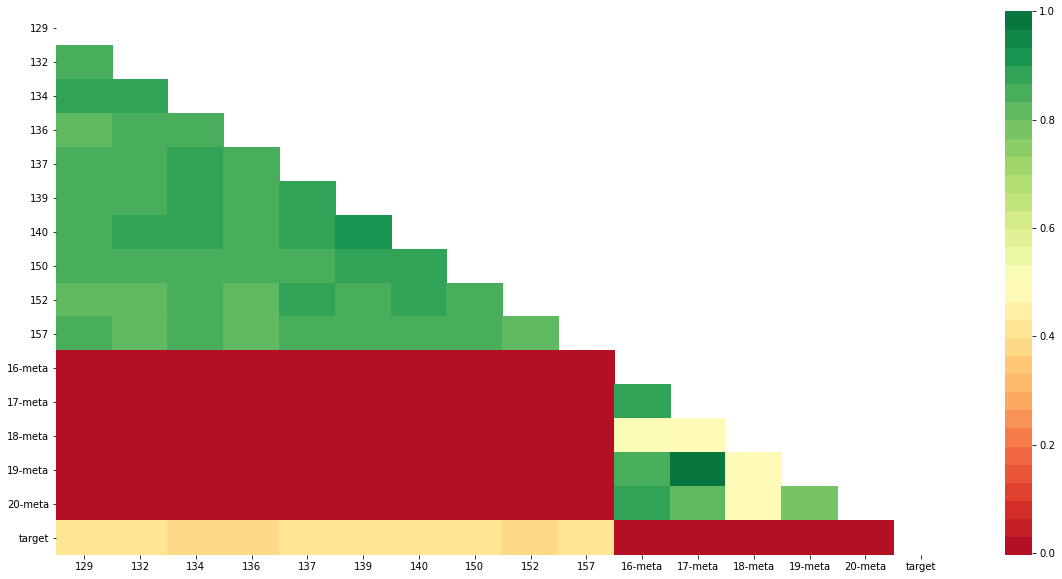

In [3]:
corr = oof_df[[col for col in oof_df.columns if col[0].isdigit()] + ['target']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette("RdYlGn", 30), mask=mask)
plt.show()

In [4]:
# Correlations
corr_img = oof_df[[col for col in oof_df.columns if (col[0].isdigit()) & (not 'meta' in col)]].corr()
mean_corr = corr_img.mean()
mean_corr = mean_corr.sort_values(ascending=True)
display(mean_corr)

157    0.850136
136    0.852386
152    0.858034
129    0.860117
132    0.867214
150    0.869586
137    0.876496
134    0.880032
139    0.882444
140    0.888249
dtype: float64

In [5]:
n_combinations = 6

for n_combination in range(2,  n_combinations+1):
    iter_comb = [pair for pair in itertools.combinations([col for col in oof_df.columns if (col[0].isdigit()) 
                                                          & (not 'meta' in col) & (not '-' in col)], n_combination)]

    for permut in iter_comb:
        col_name = '-'.join(permut).replace('pred_', '')
        ensemble_cols = [col for col in permut]
        oof_df[col_name] = np.mean([oof_df[col] for col in permut], axis=0) # Simple average
        oof_df[f'exp_log_{col_name}'] = np.exp(np.mean([oof_df[col].apply(lambda x: np.log(x)) for col in permut], axis=0)) # Log Exp average        
        
        total_score = 0
        for col in ensemble_cols:
            total_score += cv_dict[col]
        oof_df[f'w_{col_name}'] = np.mean([oof_df[col]*(cv_dict[col]/total_score) for col in permut], axis=0) # Weighted average
        oof_df[f'w_exp_log_{col_name}'] = np.exp(np.mean([oof_df[col].apply(lambda x: np.log(x))*(cv_dict[col]/total_score) for col in permut], axis=0)) # Log Exp average        

In [6]:
cols = []
aucs = []
preds = []
 
for col in [col for col in oof_df.columns if '-' in col]:
    auc = roc_auc_score(oof_df['target'], oof_df[col])
    cols.append(col)
    aucs.append(auc)
    preds.append(col.count('-')+1)

oof_avg = pd.DataFrame(zip(cols, aucs, preds), columns=['Colum', 'AUC', 'Used preds']).sort_values(by=['AUC'], ascending=False)
display(oof_avg.head(15))

,Colum,AUC,Used preds
1624,w_exp_log_129-132-136-139-157,0.948618,5
1622,exp_log_129-132-136-139-157,0.948615,5
2716,w_exp_log_129-132-136-139-152-157,0.948540,6
2714,exp_log_129-132-136-139-152-157,0.948534,6
2704,w_exp_log_129-132-136-139-140-157,0.948449,6
751,w_129-132-139-157,0.948448,4
2702,exp_log_129-132-136-139-140-157,0.948447,6
749,129-132-139-157,0.948446,4
2668,w_exp_log_129-132-136-137-139-157,0.948388,6
1699,w_129-132-139-140-157,0.948383,5


# Ensemble with meta models

In [7]:
ensemble_cols = [col for col in oof_df.columns if ('-' in col) & (not 'meta' in col)]
meta_cols = [col for col in oof_df.columns if 'meta' in col]
meta_image_comb = list(itertools.product(meta_cols, ensemble_cols))


for meta_col, image_col in meta_image_comb:
    best_auc = 0
    best_weigt = 0
    for weight in range(1, 6): # Find best weights
        weight = weight/10
        auc = roc_auc_score(oof_df['target'], ((oof_df[image_col]*(1-weight)) + (oof_df[meta_col]*weight)))
        if auc > best_auc:
            best_auc = auc
            best_weigt = weight
            
    oof_df[f'{int(best_weigt*10)}*{meta_col}*{image_col}'] = (oof_df[image_col]*(1-best_weigt)) + (oof_df[meta_col]*best_weigt) # Weighted average

In [8]:
cols = []
aucs = []
preds = []
 
for col in [col for col in oof_df.columns if '*' in col]:
    auc = roc_auc_score(oof_df['target'], oof_df[col])
    cols.append(col)
    aucs.append(auc)
    preds.append(col.count('-')+1)

oof_avg = pd.DataFrame(zip(cols, aucs, preds), columns=['Colum', 'AUC', 'Used preds']).sort_values(by=['AUC'], ascending=False)
display(oof_avg.head(10))

,Colum,AUC,Used preds
15009,1*20-meta*exp_log_129-132-136-139-157,0.948635,6
15011,1*20-meta*w_exp_log_129-132-136-139-157,0.948626,6
16101,1*20-meta*exp_log_129-132-136-139-152-157,0.948576,7
16103,1*20-meta*w_exp_log_129-132-136-139-152-157,0.948535,7
15008,1*20-meta*129-132-136-139-157,0.948482,6
14136,1*20-meta*129-132-139-157,0.948482,5
16091,1*20-meta*w_exp_log_129-132-136-139-140-157,0.948454,7
16088,1*20-meta*129-132-136-139-140-157,0.948449,7
16089,1*20-meta*exp_log_129-132-136-139-140-157,0.948409,7
16100,1*20-meta*129-132-136-139-152-157,0.948402,7


# Best results

In [9]:
cols = []
aucs = []
preds = []
 
for col in [col for col in oof_df.columns if '-' in col]:
    auc = roc_auc_score(oof_df['target'], oof_df[col])
    cols.append(col)
    aucs.append(auc)
    preds.append(col.count('-')+1)

oof_avg = pd.DataFrame(zip(cols, aucs, preds), columns=['Colum', 'AUC', 'Used preds']).sort_values(by=['AUC'], ascending=False)
display(oof_avg.head(20))

,Colum,AUC,Used preds
18362,1*20-meta*exp_log_129-132-136-139-157,0.948635,6
18364,1*20-meta*w_exp_log_129-132-136-139-157,0.948626,6
1624,w_exp_log_129-132-136-139-157,0.948618,5
1622,exp_log_129-132-136-139-157,0.948615,5
19454,1*20-meta*exp_log_129-132-136-139-152-157,0.948576,7
2716,w_exp_log_129-132-136-139-152-157,0.948540,6
19456,1*20-meta*w_exp_log_129-132-136-139-152-157,0.948535,7
2714,exp_log_129-132-136-139-152-157,0.948534,6
17489,1*20-meta*129-132-139-157,0.948482,5
18361,1*20-meta*129-132-136-139-157,0.948482,6
